In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

In [2]:
from callback.guest_callback_per_episode import CallbackPerEpisode
import numpy as np

In [3]:
train = CallbackPerEpisode()

In [4]:
data = train.load_data("train_result_2025_09_25/train_20250925.pkl")

Callback data loaded from train_result_2025_09_25/train_20250925.pkl


In [5]:
from datetime import datetime
date_str = datetime.now().strftime("%Y_%m_%d")
os.makedirs(f"train_result_2025_09_25/train_result_{date_str}", exist_ok=True)

--------------
{'rewards': [0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.35353535, 0.37254903, 0.37254903, 0.3904762, 0.3904762, 0.3846154, 0.37984496, 0.37588653, 0.37254903, 0.36969697, 0.36723164, 0.36507937, 0.3631841, 0.3631841, 0.4009662, 0.42723006, 0.44292238, 0.45777777, 0.47186148, 0.47186148, 0.4871795, 0.5021097, 0.5021097, 0.51666665, 0.5308642, 0.5308642, 0.52156866, 0.5131086, 0.50537634, 0.49828178, 0.49174917, 0.4857143, 0.48012233, 0.47492626, 0.47492626, 0.48405796, 0.49287748, 0.5014006, 0.5096419, 0.5176152, 0.5176152, 0.511811, 0.5063613, 0.5012346, 0.4964029, 0.4918415, 0.48752835, 0.4834437, 0.47956988, 0.47956988, 0.475891, 0.47239265, 0.46906188, 0.46588695, 0.46285716, 0.45996276, 0.4571949, 0.45454547, 0.45454547, 0.46031746, 0.46596858, 0.4715026, 0.47692308, 0.4822335, 0.4822335, 0.4792703, 0.47642276, 0.47368422, 0.4710485, 0.46850997, 0.46606335, 0.4637037, 0.4614265, 0.4614265, 0.46608946,

IndexError: index 3 is out of bounds for axis 0 with size 3

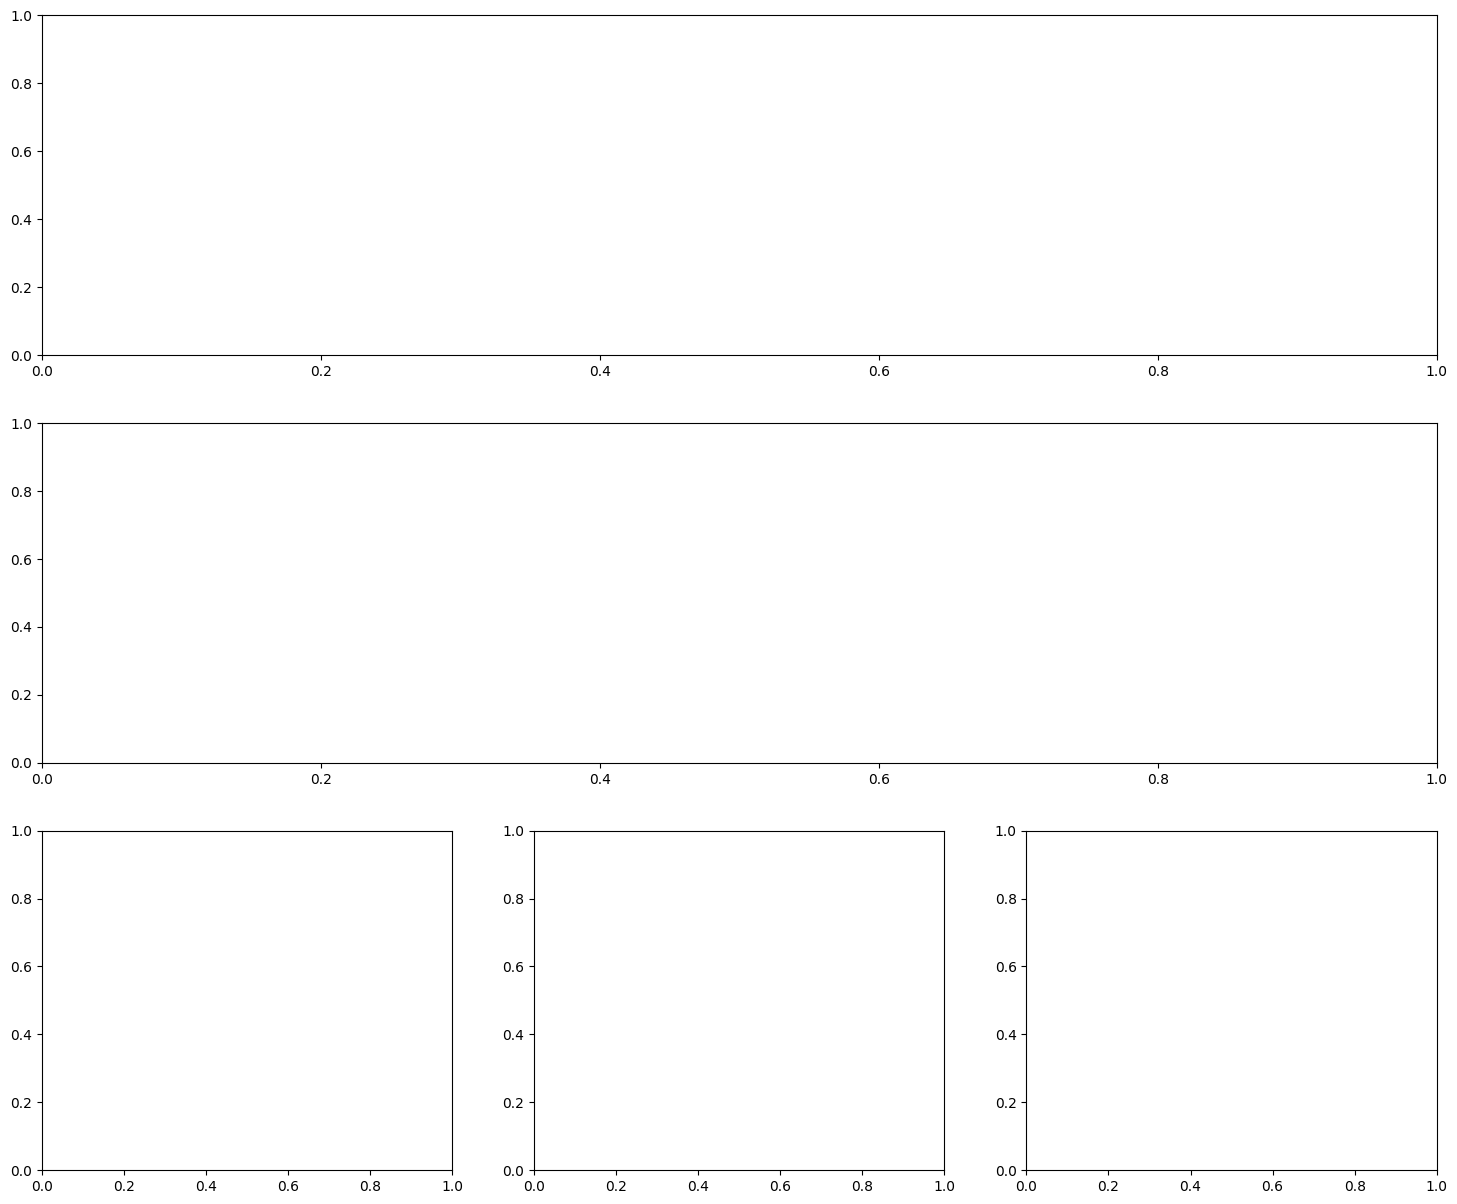

In [6]:
train._create_episode_plot_3(1, f"train_result_2025_09_25/train_result_{date_str}")

KeyboardInterrupt: 

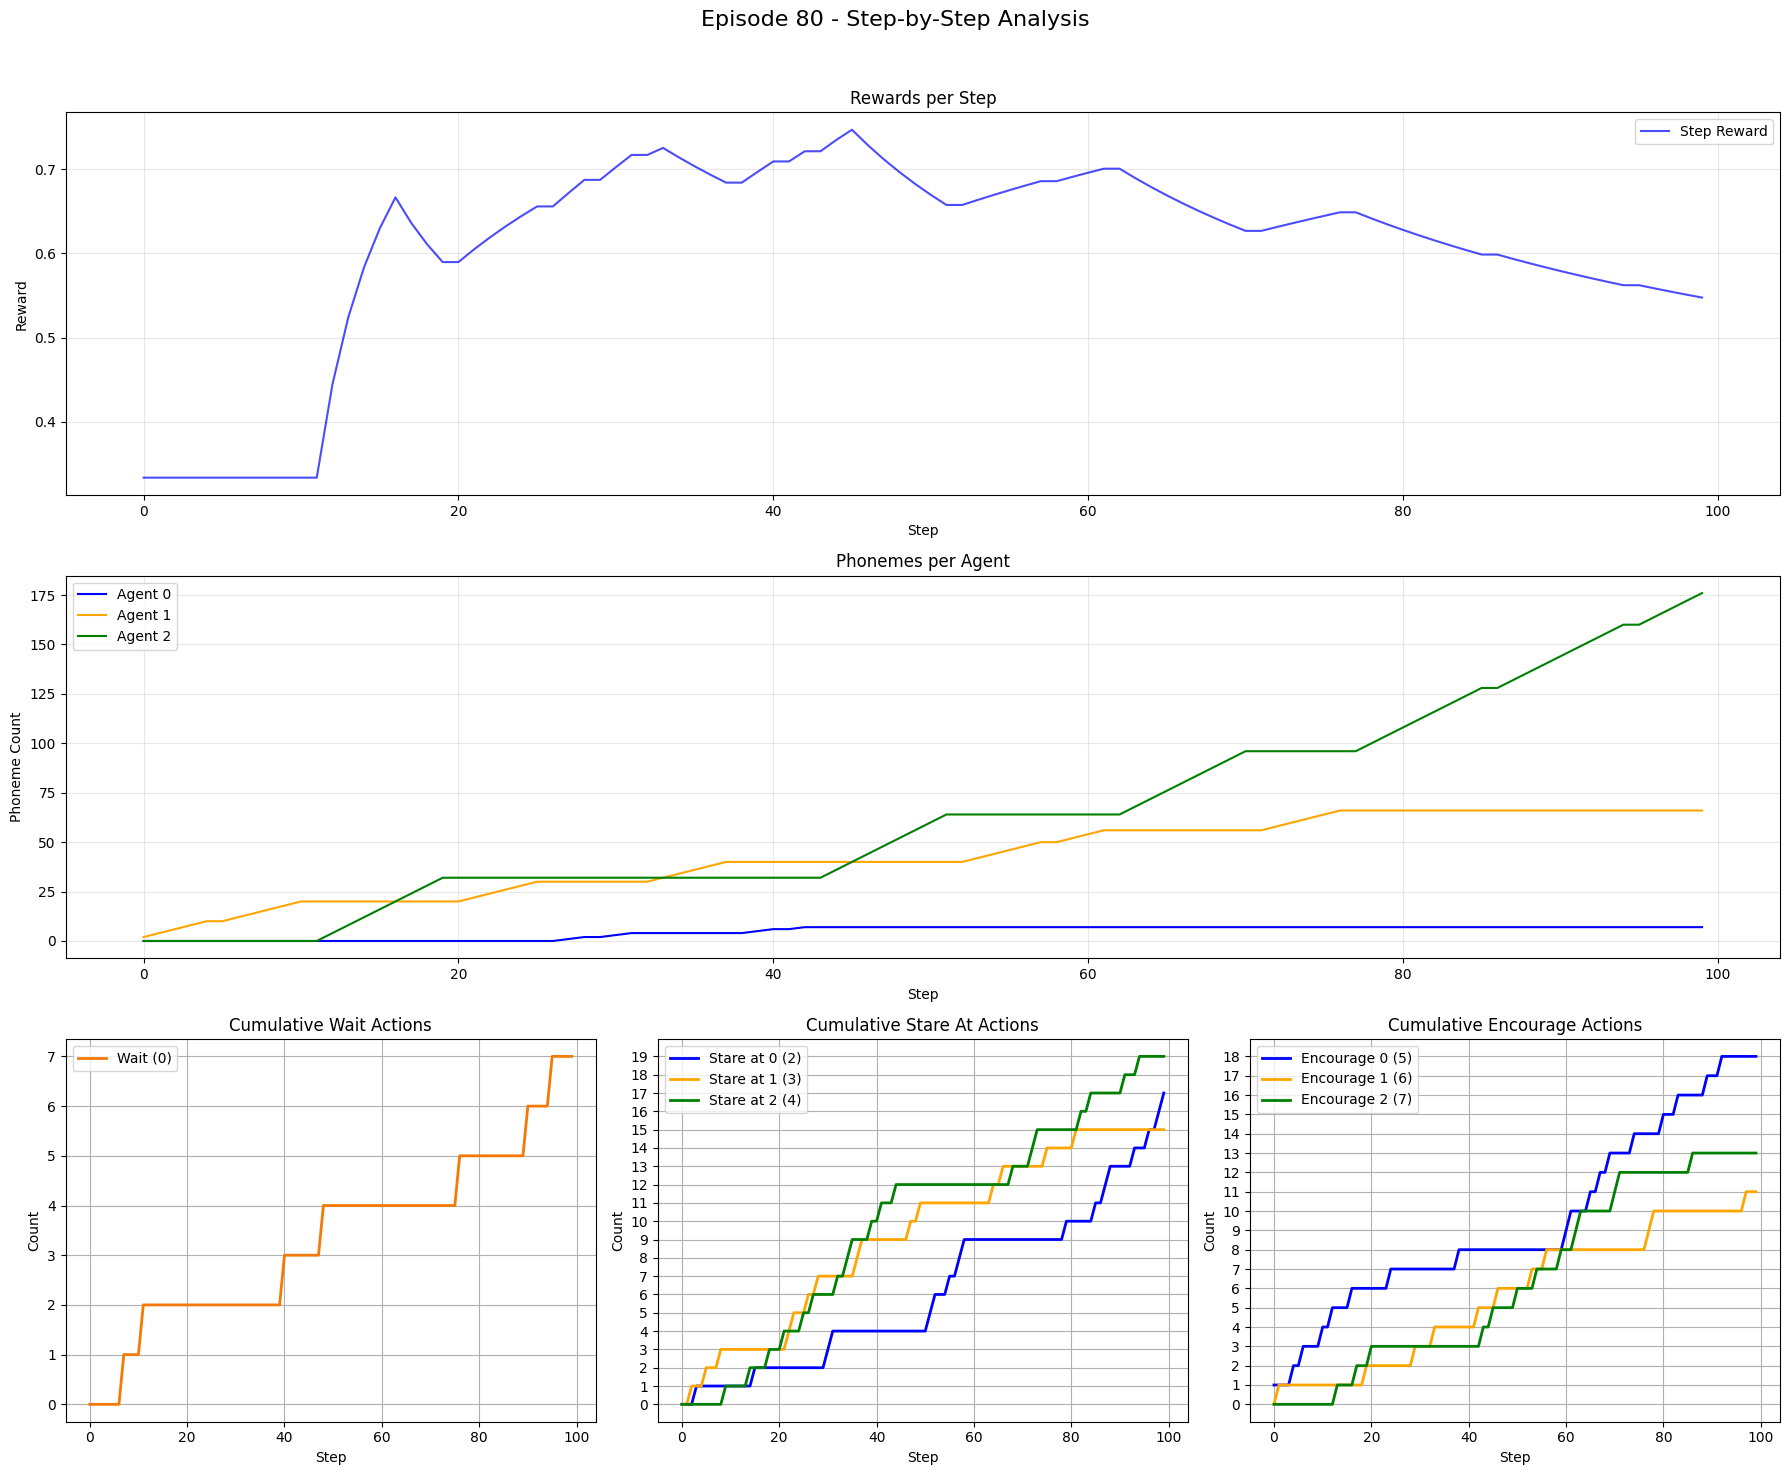

In [20]:
import os
# Create the directory if it doesn't exist
os.makedirs(f"train_result_2025_09_17/train_result_{date_str}", exist_ok=True)
for i in range(720):
    train._create_episode_plot_3(i, f"train_result_2025_09_17/train_result_{date_str}")

IndexError: index 3 is out of bounds for axis 0 with size 3

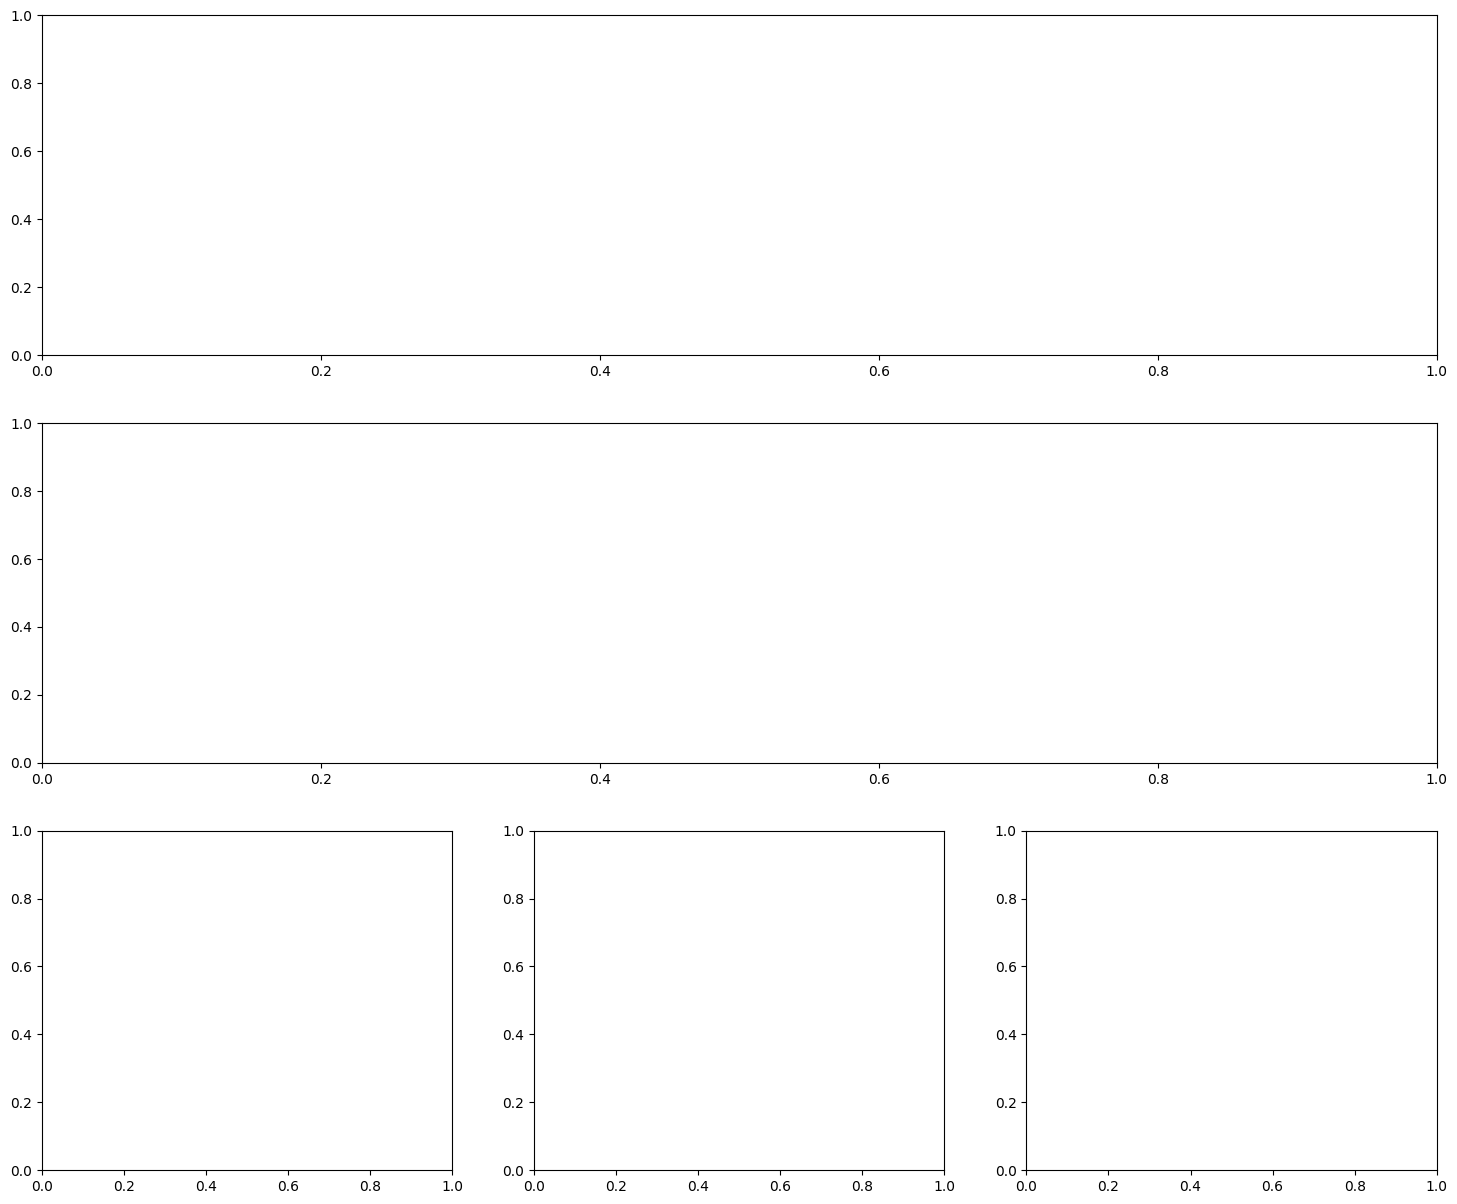

In [6]:
train._create_episode_plot_3(1, f"train_result_2025_09_25/train_result_{date_str}")

In [7]:
import os
# Create the directory if it doesn't exist
os.makedirs(f"train_result_2025_09_25/summary_plot_{date_str}", exist_ok=True)
train._create_summary_plots(f"train_result_2025_09_25/summary_plot_{date_str}")

In [ ]:
data = train.load_data("train_result_2025_09_16/train_20250903.pkl")

Callback data loaded from train_result_2025_09_03/train_20250903.pkl


In [12]:
import os
# Create the directory if it doesn't exist
os.makedirs(f"train_result_2025_09_03/summary_plot__1_{date_str}", exist_ok=True)
train._create_summary_plots(f"train_result_2025_09_03/summary_plot__1_{date_str}")

In [13]:
data = train.load_data("train_result_2025_09_03/train_20250903.pkl")

Callback data loaded from train_result_2025_09_03/train_20250903.pkl


In [14]:
import os
# Create the directory if it doesn't exist
os.makedirs(f"train_result_2025_09_03/summary_plot__2_{date_str}", exist_ok=True)
train._create_summary_plots(f"train_result_2025_09_03/summary_plot__2_{date_str}")

In [15]:
data = train.load_data("train_result_2025_09_03/train_20250903.pkl")

Callback data loaded from train_result_2025_09_03/train_20250903.pkl


In [16]:
import os
# Create the directory if it doesn't exist
os.makedirs(f"train_result_2025_09_03/summary_plot__3_{date_str}", exist_ok=True)
train._create_summary_plots(f"train_result_2025_09_03/summary_plot__3_{date_str}")

In [17]:
data = train.load_data("train_result_2025_09_03/train_20250903.pkl")
import os
# Create the directory if it doesn't exist
os.makedirs(f"train_result_2025_09_03/summary_plot__4_{date_str}", exist_ok=True)
train._create_summary_plots(f"train_result_2025_09_03/summary_plot__4_{date_str}")

Callback data loaded from train_result_2025_09_03/train_20250903.pkl
